In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

In [6]:
len(y_train)

60000

In [7]:
len(y_test)

10000

In [23]:
x_train.shape

(60000, 28, 28)

In [24]:
x_train[0].shape

(28, 28)

In [9]:
x_train[0] 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

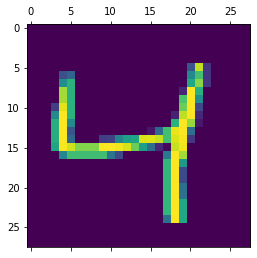

In [10]:
plt.matshow(x_train[2])

In [11]:
y_train[0]

5

In [13]:
y_train[2]

4

In [14]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [35]:
x_train = x_train / 255
x_test = x_test / 255

In [36]:
x_train_flattened= x_train.reshape(len(x_train),28*28)
x_test_flattened= x_test.reshape(len(x_test),28*28)

In [37]:
x_train_flattened.shape

(60000, 784)

In [38]:
x_test_flattened.shape

(10000, 784)

In [39]:
x_train_flattened[0] #hence we converted a 2d image into 1 d image 

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [43]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile( 
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4874 - accuracy: 0.8781
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3055 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2851 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2746 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2682 - accuracy: 0.9261


In [45]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2637 - accuracy: 0.9263


[0.26365622878074646, 0.9262999892234802]

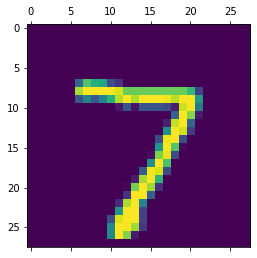

In [50]:
plt.matshow(x_test[0])

In [52]:
y_predicted= model.predict(x_test_flattened)
y_predicted[0]


array([1.32715622e-05, 1.15453584e-10, 4.70088926e-05, 1.10110044e-02,
       8.93706101e-07, 8.75954865e-05, 1.16375576e-09, 7.37124562e-01,
       7.83454307e-05, 7.63922930e-04], dtype=float32)

In [53]:
np.argmax(y_predicted[0])

7

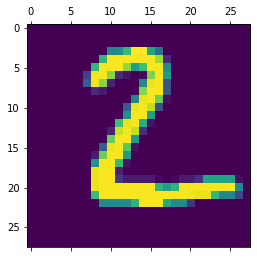

In [54]:
plt.matshow(x_test[1])

In [55]:
np.argmax(y_predicted[1])

2

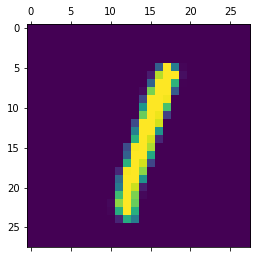

In [56]:
plt.matshow(x_test[5])

In [57]:
np.argmax(y_predicted[5])

1

In [58]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [61]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    0,    2,    0,    5,   11,    2,    3,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   5,    9,  914,   18,    8,    5,   13,   10,   47,    3],
       [   3,    0,   15,  925,    0,   23,    2,   12,   25,    5],
       [   1,    1,    3,    1,  921,    0,   10,    3,   12,   30],
       [   8,    2,    1,   32,   11,  776,   15,    5,   36,    6],
       [   7,    3,    5,    1,    7,   12,  918,    2,    3,    0],
       [   1,    6,   24,    6,    8,    1,    0,  945,    3,   34],
       [   5,    7,    5,   18,    9,   20,   10,   10,  885,    5],
       [  10,    7,    1,   10,   31,    7,    0,   20,   13,  910]])>

Text(69.0, 0.5, 'Truth')

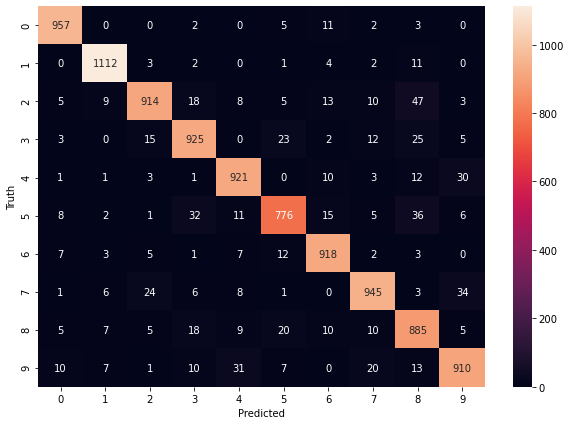

In [64]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap (cm, annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [71]:
model = keras.Sequential([
    keras.layers.Dense(1000, input_shape=(784,), activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile( 
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1935 - accuracy: 0.94200s - loss: 0.1939 - accuracy: 
Epoch 2/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0844 - accuracy: 0.9735
Epoch 3/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0562 - accuracy: 0.98260s - loss:
Epoch 4/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0420 - accuracy: 0.9864
Epoch 5/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0325 - accuracy: 0.9896


In [72]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0742 - accuracy: 0.9816


[0.07419774681329727, 0.9815999865531921]

Text(69.0, 0.5, 'Truth')

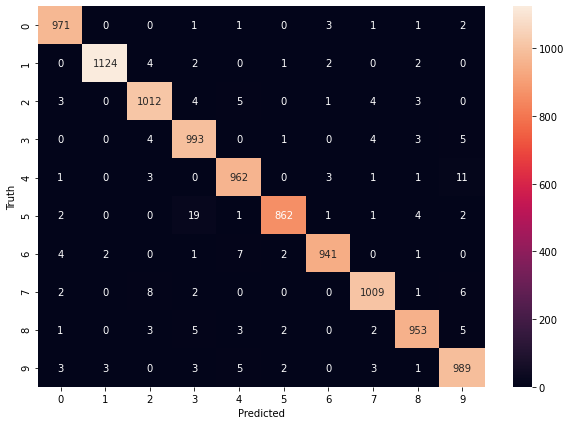

In [73]:
y_predicted= model.predict(x_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap (cm, annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')




In [74]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(1000, input_shape=(784,), activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile( 
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1932 - accuracy: 0.9423
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0826 - accuracy: 0.9746
Epoch 3/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0551 - accuracy: 0.9827
Epoch 4/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0427 - accuracy: 0.9863
Epoch 5/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0343 - accuracy: 0.9895
